# LEAST SQUARES MULTIVARIATE REGRESSION MODEL 

In [76]:
from IPython.display import Image

In [1]:
import pandas as pd
import numpy as np
import math 

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

train_raw = pd.read_csv(r"D:\ML\Assignment 2\Train (1).csv",low_memory=False)
test = pd.read_csv(r"D:\ML\Assignment 2\Test.csv",low_memory= False)
train_raw.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [2]:
def MULTIREG(x,y):
    """Multivariate coefficient determination
    parameters:
        x: pandasdataframe
        y: pandasdataframe
    returns: values of linear regression 
            coefficients in a numpy column 
            matrix.
    """
    A_val = pd.DataFrame(x)
    one =[]
    for i in range(len(x)):
        one.append(float(1))
    A_val['ones'] = one
    #preparing matrix A with column of 1's.
    A= A_val.values # numpy array of values of A
    #print(type(A))
    At = A.transpose() #transpose of A
    #print(type(At))
    AtA = np.matmul(At,A) # At*A 
    AtA_mat = np.matrix(AtA) # converting to matrix
    AtA_inv = (AtA_mat.I) # calculating inverse
    b = np.array([y.values]).T # transposing the B matrix
    #.T is the transpose feature
    Atb = np.matmul(At,b)
    Atb_mat = np.matrix(Atb) # converting to matrix
    Res = np.matmul(AtA_inv,Atb_mat)
    return Res
    

# MATRIX REPRESENTAION OF THE DATA SET "\u"
- <b>Here, the value of p is 5 as there are 5 predictor variables.</b>

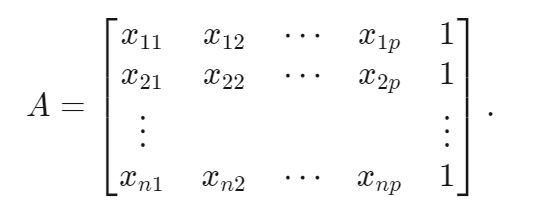

In [94]:
Image("D:\ML\Assignment 2\images\matrixA.png")

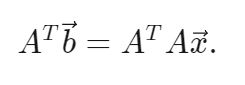

In [95]:
Image("D:\ML\Assignment 2\images\equation.png")

# ERROR FUNCTION


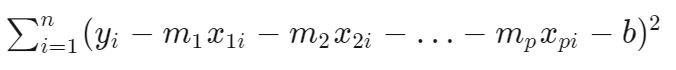

In [86]:
Image("D:\ML\Assignment 2\images\error.png")

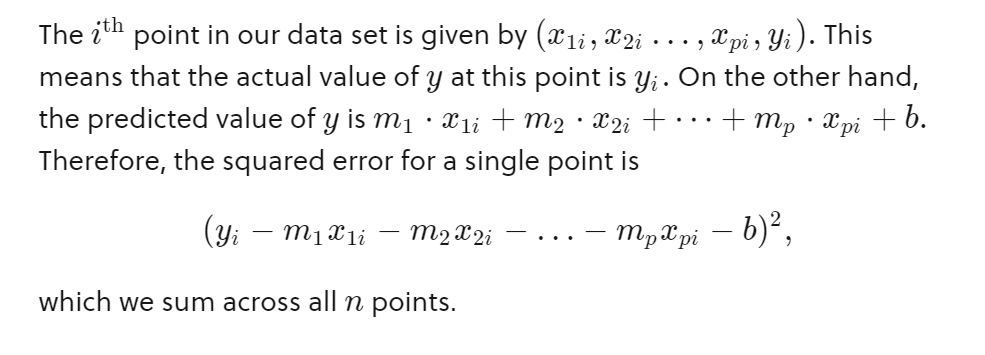

In [80]:
Image("D:\ML\Assignment 2\images\error2.png")

In [3]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [4]:
def predict(x,coeffs):
    A_val = pd.DataFrame(x)
    one =[]
    for i in range(len(x)):
        one.append(float(1))
    A_val['ones'] = one
    #preparing matrix A
    A= A_val.values 
    #numpy array of values of A
    res = np.matmul(A,coeffs)
    Res = res.tolist()
    return Res

In [5]:
features = []
for i in range(1,6):
    features.append("feature_"+str(i))
features
y = train_raw['target']
train = train_raw[features]

      feature_1  feature_2  feature_3  feature_4  feature_5
0      0.293416  -0.945599  -0.421105   0.406816   0.525662
1     -0.836084  -0.189228  -0.776403  -1.053831   0.597997
2      0.236425   0.132836  -0.147723   0.699854  -0.187364
3      0.175312   0.143194  -0.581111  -0.122107  -1.292168
4     -1.693011   0.542712  -2.798729  -0.686723   1.244077
...         ...        ...        ...        ...        ...
1595  -0.274961  -0.820634  -0.757173  -0.147555  -0.307149
1596  -0.076099   0.255257   0.290054   1.796036   0.340350
1597   1.044177  -0.899206   1.730399  -1.871057   0.442520
1598  -1.269173  -0.005052   1.857669  -1.080365   0.736334
1599  -1.884000  -0.849427  -1.452270   0.488613   1.459576

[1600 rows x 5 columns]


0       -82.154667
1       -48.897960
2        77.270371
3        -2.988581
4       -37.596722
           ...    
1595    -80.110012
1596    118.315601
1597   -107.510508
1598    -47.341558
1599   -115.939003
Name: target, Length: 1600, dtype: float64

In [ ]:
x_train =train[:1300]
x_valid =train[1300:]
y_train =y[:1300]
y_valid =y[1300:]

#print(x_train.head(),"\n",y_train.head())

## - y_train represents my b vector.
## - x_train is the matrix A.
 

In [40]:
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077
...,...,...,...,...,...
1295,-0.329237,-0.004680,0.039159,0.889419,0.582656
1296,-0.140257,0.090330,0.616869,2.630189,0.633329
1297,-1.671350,-1.421966,0.905544,0.839114,0.326199
1298,-0.038778,-1.152013,-1.137305,-0.271473,1.261162


In [41]:
x_valid

,feature_1,feature_2,feature_3,feature_4,feature_5
1300,-1.286183,-0.711930,1.197110,0.478347,-0.144186
1301,-0.942203,-0.186095,-2.596725,0.747585,-0.343604
1302,0.758751,-0.825689,-0.955613,-0.133021,-1.079918
1303,0.046198,0.425245,0.510699,-0.264584,1.169689
1304,-0.258607,0.712500,0.386820,0.180333,1.234256
...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149
1596,-0.076099,0.255257,0.290054,1.796036,0.340350
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334


In [96]:
y_train

0       -82.154667
1       -48.897960
2        77.270371
3        -2.988581
4       -37.596722
           ...    
1295     52.031081
1296    152.001551
1297   -123.144549
1298   -102.737361
1299    -38.966165
Name: target, Length: 1300, dtype: float64

In [97]:
y_valid

1300    -31.393969
1301    -37.282081
1302    -51.961071
1303     13.367693
1304     81.191340
           ...    
1595    -80.110012
1596    118.315601
1597   -107.510508
1598    -47.341558
1599   -115.939003
Name: target, Length: 300, dtype: float64

## Training the model on the basis of the training sets x_train and y_train.

In [7]:
model = MULTIREG(x_train,y_train)

In [45]:
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5,ones
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,1.0
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,1.0
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,1.0
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,1.0
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,1.0
...,...,...,...,...,...,...
1295,-0.329237,-0.004680,0.039159,0.889419,0.582656,1.0
1296,-0.140257,0.090330,0.616869,2.630189,0.633329,1.0
1297,-1.671350,-1.421966,0.905544,0.839114,0.326199,1.0
1298,-0.038778,-1.152013,-1.137305,-0.271473,1.261162,1.0



   #   Predictions for training and validation sets.
 - <b> <i>the variables 'pred_trn_list' and 'pred_valid_list' store the predicted values of the target variable for the training and the validation sets respectively.</i> </b>


In [61]:
preds_train= predict(x_train,model)
preds_valid= predict(x_valid,model)
pred_trn_list=[]
pred_valid_list=[]
for i in preds_train:
    pred_trn_list.append(i[0])
for i in preds_valid:
    pred_valid_list.append(i[0])

In [44]:
pred_valid_list[:10]

[-67.43903616215574,
 -28.871329961504237,
 -65.73300320977776,
 41.01389183061058,
 77.70833835164036,
 66.60528468248768,
 -15.538575566150449,
 149.43141488533507,
 -32.61734788637331,
 78.58788265543222]

In [62]:
print(y_valid.max())
print(y_valid.min())

337.64301435601914
-287.5046120528067


# ROOT MEAN SQUARED ERRORS

In [65]:
print("Root mean squared errors")
print("Training Set:",rmse(pred_trn_list,y_train))
print("Validation Set:",rmse(pred_valid_list,y_valid))


Root mean squared errors
Training Set: 20.449353058906564
Validation Set: 20.143708353171608


In [100]:
print("Change percentage from training to validation:",((rmse(pred_valid_list,y_valid)-rmse(pred_trn_list,y_train))/rmse(pred_trn_list,y_train))*100,"%")

Change percentage from training to validation: -1.4946424214717862 %


 -  The <b>small change percentage</b> in the<b> rmse </b>of the trainig set and the validation set indicates that the model has <b>not overfitted </b>corresponding to the training set and thus is<b> predictive</b> for new data sets.

In [ ]:
- <b> We can observe that the root mean squared error 

In [71]:
pred_test = list(predict(test,model))
#pred_test_list=[]
pred_list_test = []
for i in (pred_test):
    pred_list_test.append(i[0])
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,ones
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503,1.0
1,-0.375021,0.953185,0.626719,0.704406,-0.355489,1.0
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201,1.0
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286,1.0
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925,1.0


In [74]:
test_frame = pd.DataFrame(pred_list_test,index=None,columns=['Target'])
test_frame


,Target
0,112.860101
1,117.876250
2,-22.207973
3,-43.729291
4,-95.503768
...,...
395,-81.703392
396,-184.787403
397,124.183240
398,65.653981


In [75]:
test_frame.to_csv('D:\ML\Assignment 2\TEST_file_Harshit.csv',index = False)